# GHG inventory by country from EDGAR
Source:
- EDGAR - GHG emissions of all world countries 2024 report (https://edgar.jrc.ec.europa.eu/report_2024)
    - UNFCCC(https://di.unfccc.int/time_series) has an official reports from Paris Agreement countries, but data availability by countries is not sufficient
    - One potential bias is this data could be calculated so that EU countries have benefits
- API is not avaiable; Downloaded an Excel file and stored in data/raw/

In [ ]:
print('Something changed')

## 1. Import data

In [1]:
import pandas as pd
df = pd.read_excel("../data/raw/EDGAR_2024_GHG_booklet_2024.xlsx", sheet_name="GHG_totals_by_country" ,header=0)
df.head()

,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,Aruba,0.036713,0.041538,0.052391,0.057360,0.056630,0.070743,0.069793,0.080624,...,0.469468,0.490990,0.514539,0.496141,0.495532,0.588998,0.482160,0.531202,0.533603,0.561498
1,AFG,Afghanistan,15.437430,15.364077,13.316628,13.934875,15.177862,15.843058,15.943325,16.088215,...,27.420132,27.408332,26.633999,27.691927,27.553282,26.982777,26.646320,27.643074,28.614071,29.460052
2,AGO,Angola,18.998763,18.866057,21.459002,23.018941,23.685423,22.519608,18.586243,23.251029,...,77.295699,81.775031,78.875889,73.424409,69.504638,69.910832,61.680081,64.408994,67.210842,67.700756
3,AIA,Anguilla,0.003355,0.003396,0.003534,0.003411,0.003694,0.003968,0.003833,0.003960,...,0.031210,0.031334,0.031728,0.032476,0.031594,0.030948,0.026037,0.025224,0.025068,0.026211
4,AIR,International Aviation,172.478021,172.465452,182.459819,190.296910,183.162104,177.165836,177.483077,193.593366,...,514.263976,543.354255,567.631287,597.771580,624.135612,633.464502,302.632337,335.728729,416.953422,498.178114


## 2. Filter data
- Since it makes sense to have GLOBAL TOTAL and EU as well from the policy perspective, extract top 10 countries, and GLOBAL TOTAL and EU
- Use recent 10 years (2014-2023)

In [40]:
df.columns

Index(['EDGAR Country Code',            'Country',                 1970,
                       1971,                 1972,                 1973,
                       1974,                 1975,                 1976,
                       1977,                 1978,                 1979,
                       1980,                 1981,                 1982,
                       1983,                 1984,                 1985,
                       1986,                 1987,                 1988,
                       1989,                 1990,                 1991,
                       1992,                 1993,                 1994,
                       1995,                 1996,                 1997,
                       1998,                 1999,                 2000,
                       2001,                 2002,                 2003,
                       2004,                 2005,                 2006,
                       2007,                 2008, 

In [41]:
df = df.sort_values(by=2023, ascending=False)[0:12]
df = df[["Country"] + list(range(2014, 2024, 1))]
print(df.Country)
df.head()

213     GLOBAL TOTAL
36             China
198    United States
90             India
211             EU27
160           Russia
27            Brazil
89         Indonesia
99             Japan
92              Iran
162     Saudi Arabia
33            Canada
Name: Country, dtype: object


,Country,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
213,GLOBAL TOTAL,48930.176837,48808.767176,49058.441256,49878.733809,51026.627449,51278.347920,49327.538885,51568.250032,51968.471601,52962.900859
36,China,13295.500029,13118.895552,13105.715333,13362.318184,13955.693169,14275.531317,14497.898717,15175.619087,15159.641990,15943.986553
198,United States,6448.331334,6328.997918,6206.284817,6151.772377,6337.399699,6212.456748,5671.604437,5997.650745,6046.215739,5960.804380
90,India,3270.370249,3302.487552,3355.647928,3498.402072,3661.865796,3642.410443,3433.618984,3679.861776,3897.208990,4133.554356
211,EU27,3825.528400,3879.728839,3889.377080,3912.269335,3830.658886,3678.016394,3388.278789,3577.018019,3482.310460,3221.794615


## 3. Pivot data
- Pivot data so that years are in rows for visualization
- Change type of "Year" column to datetime to make sure it is recognized as date

In [42]:
df.index = df["Country"]
df = df.drop('Country', axis=1)
df = df.stack().reset_index()
df.columns = ["Country", "Year", "Emission (MtCO2eq/yr)"]
df["Year"] = pd.to_datetime(df["Year"], format="%Y")
df.head()

,Country,Year,Emission (MtCO2eq/yr)
0,GLOBAL TOTAL,2014-01-01,48930.176837
1,GLOBAL TOTAL,2015-01-01,48808.767176
2,GLOBAL TOTAL,2016-01-01,49058.441256
3,GLOBAL TOTAL,2017-01-01,49878.733809
4,GLOBAL TOTAL,2018-01-01,51026.627449


## 1.3 Visualization
Visualize emissions by region or country

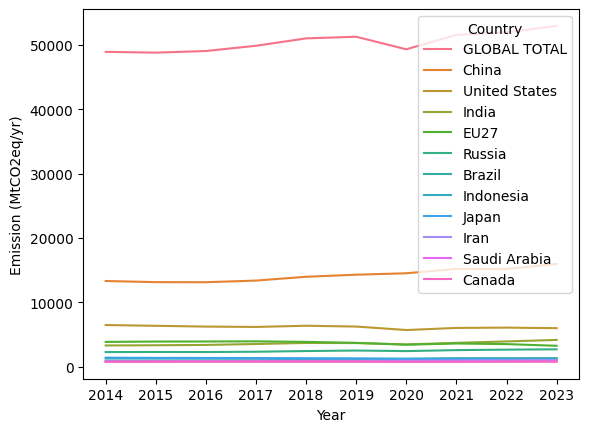

In [52]:
import sys
sys.path.append("../src/")
from EDGAR_visualization import EDGAR_visualization

viz = EDGAR_visualization()

# Emissions incl. GLOBAL TOTAL
viz.lineplot(df)

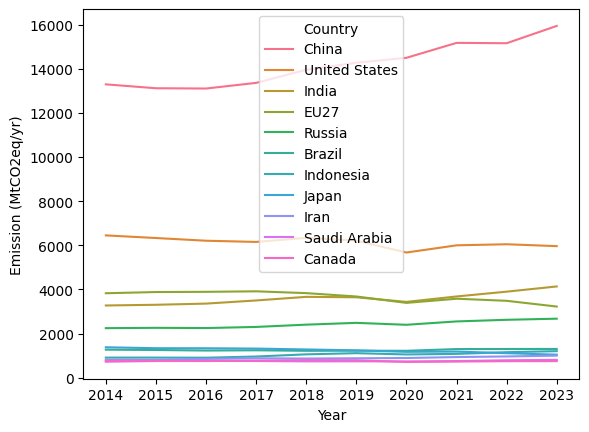

In [53]:
# Emission excl. GLOBAL TOTAL
df_ex_global = df[df["Country"] != "GLOBAL TOTAL"]
viz.lineplot(df_ex_global)